In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

In [2]:
train=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
submission=pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape,test.shape

((42000, 785), (28000, 784))

<AxesSubplot:>

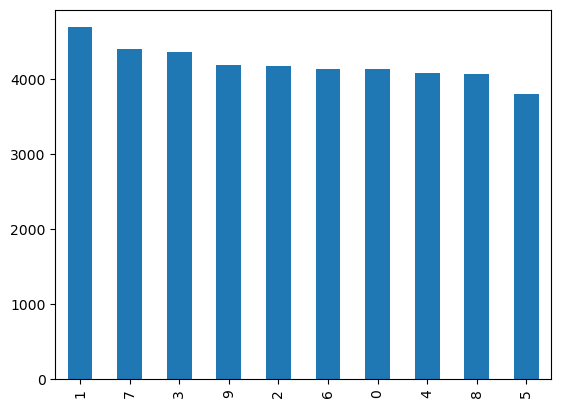

In [5]:
# lets explore the target variable

train.label.value_counts().plot(kind="bar")

In [6]:
#model-1

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [7]:
dtree=DecisionTreeClassifier()
xgb=XGBClassifier() 
lda=LDA(n_components=9)

In [8]:
# splitting the data in X and y
X=train.drop("label",axis=1)
y=train.label

#Fit and Predict

pred = dtree.fit(X,y).predict(test)

In [9]:
#XGBoost Fit and Predict

pred_xgb=xgb.fit(X,y).predict(test)

In [10]:
# lda

lda=LDA(n_components=9)

pred_lda=lda.fit(X,y).predict(test)

In [11]:
# submission 

submission["Label"]=pred  # decision tree model


In [12]:
submission.to_csv("Treemodel.csv",index=False)



In [13]:
# submission 

submission["Label"]=pred_xgb  # decision tree model

In [14]:
submission.to_csv("XGBmodel.csv",index=False)



In [15]:
# submission 

submission["Label"]=pred_lda  # decision tree model

In [16]:
submission.to_csv("LDAmodel.csv",index=False)


In [17]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

In [18]:
lg=LogisticRegression()
lgbm=LGBMClassifier()
catboost=CatBoostClassifier()

In [19]:
pred_lgbm=lgbm.fit(X,y).predict(test)

In [20]:
pred_catboost=catboost.fit(X,y).predict(test)

Learning rate set to 0.095743
0:	learn: 1.9988456	total: 1.92s	remaining: 31m 54s
1:	learn: 1.7986509	total: 3.75s	remaining: 31m 12s
2:	learn: 1.6463624	total: 5.61s	remaining: 31m 4s
3:	learn: 1.5120112	total: 7.5s	remaining: 31m 7s
4:	learn: 1.4105358	total: 9.35s	remaining: 30m 59s
5:	learn: 1.3221949	total: 11.2s	remaining: 30m 51s
6:	learn: 1.2407474	total: 13s	remaining: 30m 44s
7:	learn: 1.1688672	total: 14.9s	remaining: 30m 42s
8:	learn: 1.1136048	total: 16.7s	remaining: 30m 38s
9:	learn: 1.0635293	total: 18.6s	remaining: 30m 38s
10:	learn: 1.0122400	total: 20.4s	remaining: 30m 37s
11:	learn: 0.9623926	total: 22.3s	remaining: 30m 35s
12:	learn: 0.9196919	total: 24.1s	remaining: 30m 32s
13:	learn: 0.8838494	total: 26s	remaining: 30m 34s
14:	learn: 0.8538069	total: 28.2s	remaining: 30m 53s
15:	learn: 0.8197523	total: 30.1s	remaining: 30m 52s
16:	learn: 0.7927067	total: 32s	remaining: 30m 49s
17:	learn: 0.7626219	total: 33.8s	remaining: 30m 46s
18:	learn: 0.7335991	total: 35.7s	r

In [21]:
pred_lg=lg.fit(X,y).predict(test)

In [22]:
# submission 

submission["Label"]=pred_lgbm  # decision tree model
submission.to_csv("LGBMmodel.csv",index=False)

In [23]:
# submission 

submission["Label"]=pred_catboost  # decision tree model
submission.to_csv("CBOOSTmodel.csv",index=False)

In [24]:
# submission 

submission["Label"]=pred_lg  # decision tree model
submission.to_csv("LGmodel.csv",index=False)